<a href="https://colab.research.google.com/github/venkatapotturu/Diabetics-Prediction/blob/main/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:16<00:00, 104MB/s]
100% 1.06G/1.06G [00:16<00:00, 67.2MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [7]:
#GENERATORS

train_dataset = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

test_dataset = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
#Normalisation

def normal(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_dataset = train_dataset.map(normal)
test_dataset = test_dataset.map(normal)

In [12]:
#Create a CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [13]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_dataset, epochs=10, validation_data = test_dataset)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 85ms/step - accuracy: 0.5611 - loss: 3.8263 - val_accuracy: 0.6164 - val_loss: 0.6539
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.6623 - loss: 0.6332 - val_accuracy: 0.6600 - val_loss: 0.6556
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 82ms/step - accuracy: 0.7181 - loss: 0.5563 - val_accuracy: 0.6988 - val_loss: 0.5650
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.7888 - loss: 0.4617 - val_accuracy: 0.7930 - val_loss: 0.4545
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 0.8187 - loss: 0.4015 - val_accuracy: 0.7762 - val_loss: 0.4597
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 80ms/step - accuracy: 0.8470 - loss: 0.3475 - val_accuracy: 0.6268 - val_loss: 1.0771
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 88ms/step - accuracy: 0.8877 - loss: 0.2746 - val_accuracy: 0.6820 - val_loss: 1.1251
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.9141 - loss: 0.2140 - 

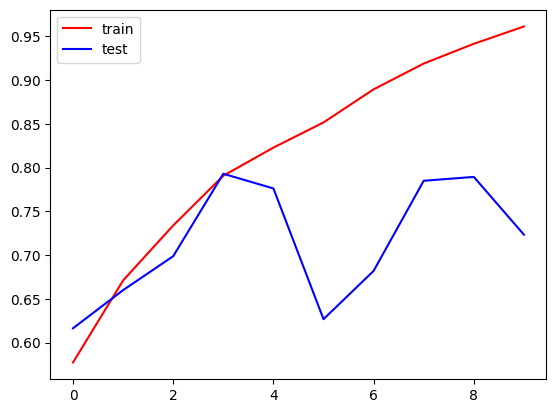

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

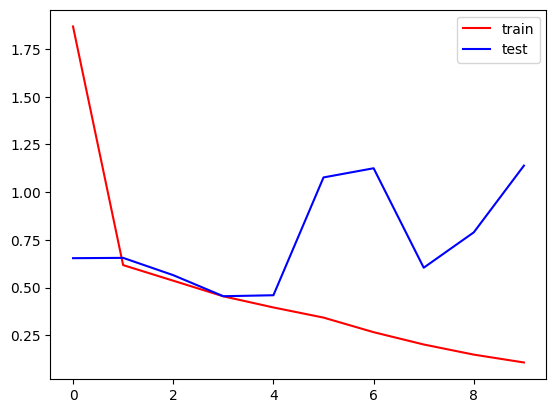

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [19]:
import cv2

In [20]:
test_img = cv2.imread('/content/dog_image.png')

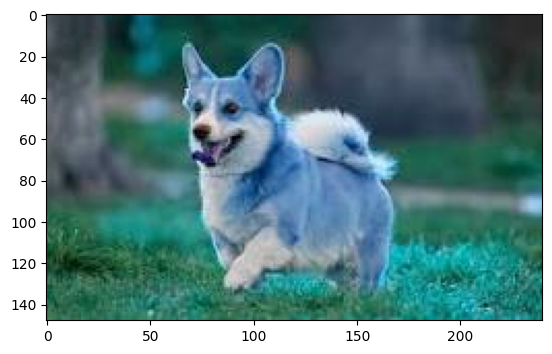

In [21]:
plt.imshow(test_img)

In [22]:
test_img.shape

(148, 240, 3)

In [24]:
test_img = cv2.resize(test_img,(256,256))

In [26]:
test_img = test_img.reshape(1,256,256,3)

In [27]:
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1.]], dtype=float32)